# BUSINESS CASE: WITH INDIAN LIVER PATIENT DATASET WE NEED TO PREDICT WHETHER A PATIENT HAS / CAN GET LIVER DISEASE OR NOT.

# Project Pipeline:
1. Import Libraries
2. Basic Checks
3. Exploratory Data Analysis
4. Data Preprocessing
5. Feature Engineering AND Feature Selection
6. Split The Data for Train and Test
7. Scale The Features
8. Balance The Data
9. Build The Models
10. Conclusion Based On The Models' Performances

## 1. Import Libraries
* All the required libraries are imported.

## 2. Basic Checks
* There was no header for the dataset.
* New feature names are given as: 'Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin', 'Albumin_Globulin_Ratio', 'Target'.
* There are 11 features with 583 records.
* In the whole dataset, there were only 4 NULL values. It was in Albumin_Globulin_Ratio feature.

## 3. Exploratory Data Analysis
* Univariate analysis is done using histplot and also using SWEETVIZ report.
     * 71% patients are with liver disease. Its an imbalanced dataset.
     * 76% of patients are Male.
     * Age of patients range from 4-90. 5.8% are 60 years old.
     * Almost 50% patients have total bilirubin between 0.6-0.8
     * Around 50% patients have direct bilirubin between 0.1-0.3

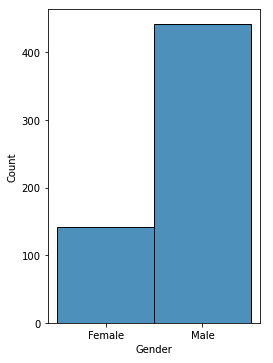     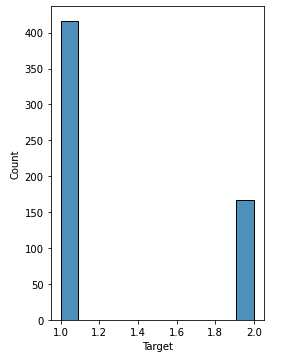
* Bivariate and multivariate analysis is done.
     * Most of the MALE patients have liver disease.
     * 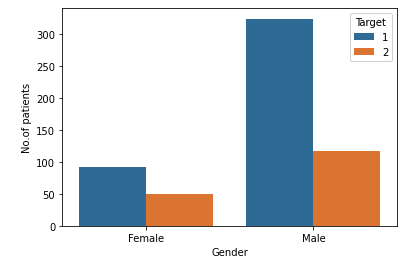
     * People around 50 years are affected with liver disease the most.
     * The patients who DO NOT have liver disease have LOW Total_Bilirubin, Direct_Bilirubin, Alamine_Aminotransferase and Aspartate_Aminotransferase.
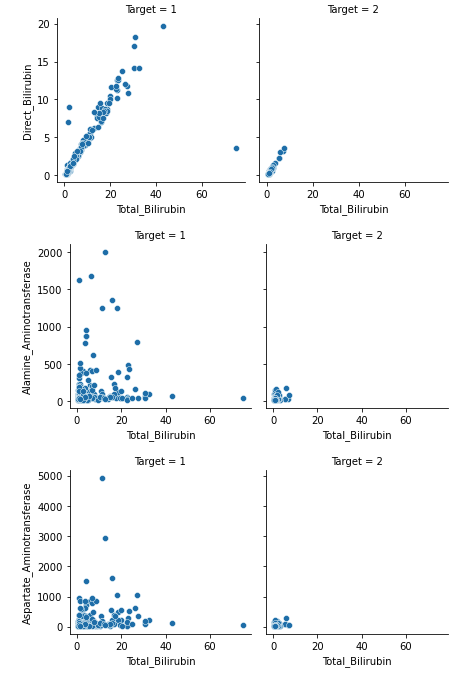


## 4. Data Preprocessing
### Impute NULL values
* The only 4 NULL values in 'Albumin_Globulin_Ratio' are imputed with mean().

### Encode Categorical Data
* Gender was the onlly categorical feature. As Male was too many, it was manually encoded to 1 and Female to 0.
* Target feature had integer 2 for 'No Liver Disease'. It was encoded to 0 for easy understanding.

### Handle Outliers
* 'Age' and 'albumin' do not have outliers.
* 'Total_Proteins' and 'Albumin_Globulin_Ratio' have 3 outliers each and they were imputed with their respective mean()s.
* Rest of the features have lot of outliers. So they were not imputed.

### Check For Duplicate Rows
* 13 records are duplicated once. Those 13 records are removed.


## 5. Feature Engineering And Feature Selection
### Check For Duplicate Features
* There are no duplicate features

### Check For Correlated Features
* There are no highly correlated (above 0.90) features.

## 6. Split The Data for Train and Test
* First, the data is split into predictors/independent features and target/dependent features.
* Then, the data is split into 25% Test and 75% Train data.

## 7. Scale The Features
* The independent features are scaled using MinMaxScaler.
* Only train data are fit-transformed. Test data was only transformed to prevent data leakage.

## 8. Balance The Data
* The dataset is highly imbalanced with more data of positive liver disease.
* smote() is used to balance the data.
* Only train data is balanced to prevent data leakage.

## 9. Build The Models
* Four models are built with and without hyperparameter tuning and checked all the metrics using classification report on balanced and unbalanced data.
* **F1-score** is used as the performance metric.

## (1) Logistic Regression
#### (a) Balanced Data
   * **0.74** without hyperparameter tuning
   * **0.69** with GridSearchCV
#### (b) Unbalanced Data
   * **0.84** without hyperparameter tuning
   * **0.84** with GridSearchCV

## (2) Support Vector Classifier
#### (a) Balanced Data
   * **0.67** without hyperparameter tuning
   * **0.70** with GridSearchCV
#### (b) Unbalanced Data
   * **0.84** without hyperparameter tuning
   * **0.84** with GridSearchCV

## (3) Random Forest 
#### (a) Balanced Data
   * **0.76** without hyperparameter tuning
   * **0.79** with RandomizedSearchCV
#### (b) Unbalanced Data
   * **0.82** without hyperparameter tuning
   * **0.83** with RandomizedSearchCV

## (4) K Nearest Neighbor
#### (a) Balanced Data
   * K=3 is chosen afte checking the error rate for multiple K values.
   * **0.62** without hyperparameter tuning 
   * **0.62** with GridSearchCV
#### (b) Unbalanced Data
   * K=9 is chosen afte checking the error rate for multiple K values.
   * **0.77** without hyperparameter tuning
   * **0.73** with GridSearchCV

### Summary
* For a model, best F1-score among the normal model and its hyperparameter-tuned model is chosen.

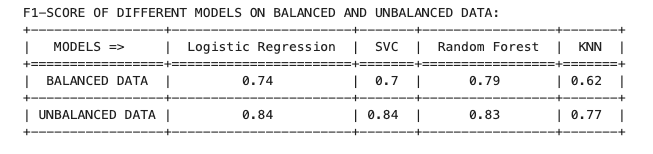



## 10. Conclusion Based On The Models' Performances
* f1-scores on UNBALANCED data are much better than on BALANCED data across the models.
* Logistic Regression,SVC and Random Forest give good f1-scores on UNBALANCED data.
* Random Forest give comparitively good f1-score on BALANCED data too.
* So, **hyperparameter-tuned Random Forest** model is the better choice.


# PROJECT IMPLEMENTATION:

# IMPORT LIBRARIES

In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score,classification_report,f1_score
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.model_selection import GridSearchCV


# BASIC CHECKS

In [2]:
data = pd.read_csv("Data 2/Indian Liver Patient Dataset (ILPD).csv")

In [3]:
data.head(2)

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [4]:
data.shape

(582, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   65      582 non-null    int64  
 1   Female  582 non-null    object 
 2   0.7     582 non-null    float64
 3   0.1     582 non-null    float64
 4   187     582 non-null    int64  
 5   16      582 non-null    int64  
 6   18      582 non-null    int64  
 7   6.8     582 non-null    float64
 8   3.3     582 non-null    float64
 9   0.9     578 non-null    float64
 10  1       582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [6]:
#File does not contain headers so we need to load the headers manually
features = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin', 'Albumin_Globulin_Ratio', 'Target']
df = pd.read_csv('Data 2/Indian Liver Patient Dataset (ILPD).csv', names = features)
df.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_Globulin_Ratio      579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df.tail(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.0,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.0,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.5,2


In [9]:
df.shape

(583, 11)

In [10]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_Globulin_Ratio', 'Target'],
      dtype='object')

In [11]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


* There are outliers present in 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase' as there is a huge gap between 75 percentile data and the max value.

In [12]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_Globulin_Ratio        4
Target                        0
dtype: int64

* There are 4 NULL values in 'Albumin_Globulin_Ratio'.

# Exploratory Data Analysis

## Univariate Analysis

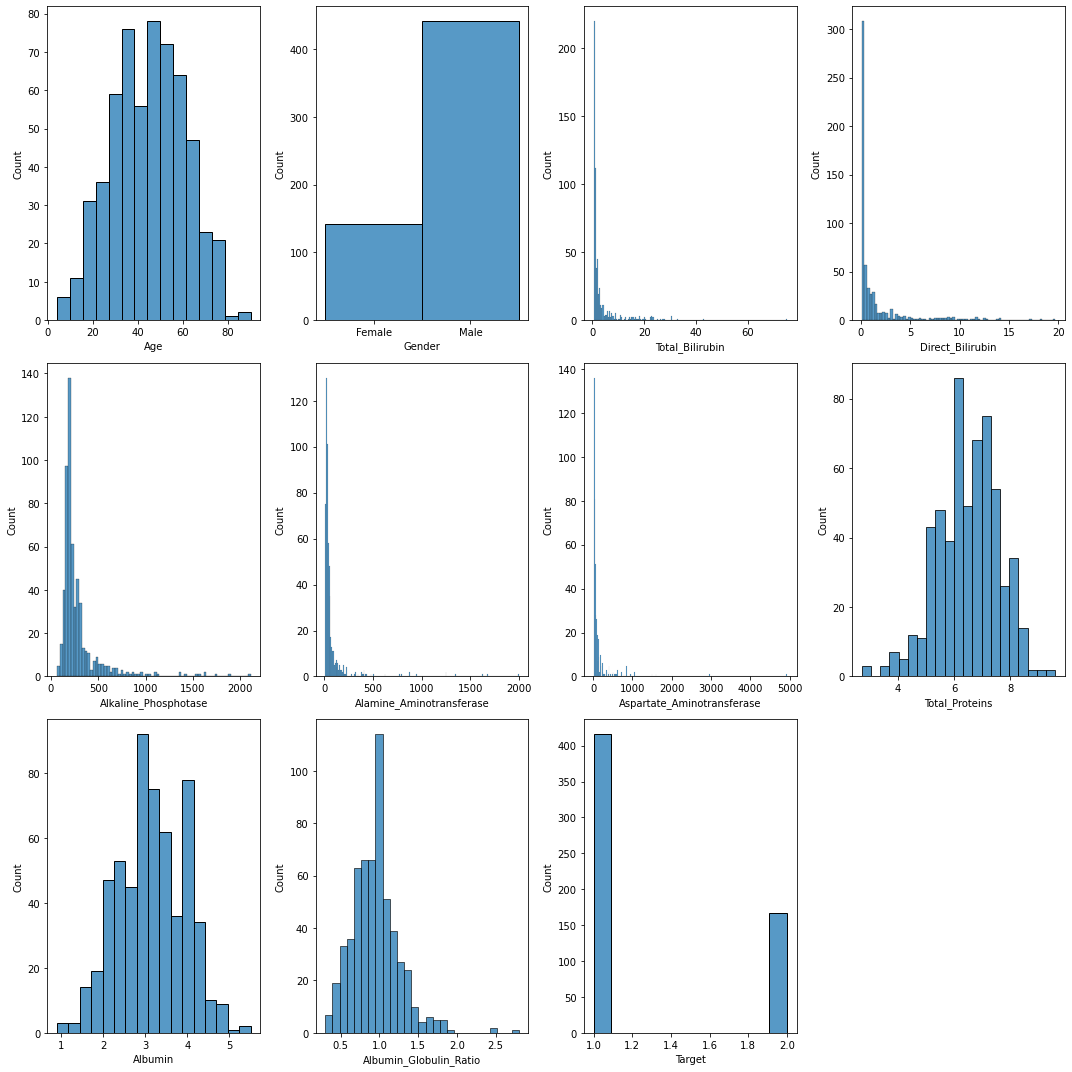

In [13]:

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plotnumber=plotnumber+1
plt.tight_layout()

In [ ]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()

### Key Observations:
* Age of patients range from 4-90. 5.8% are 60 years old.
* 76% of patients are Male.
* Almost 50% patients have total bilirubin between 0.6-0.8
* Around 50% patients have direct bilirubin between 0.1-0.3
* 71% patients are with liver disease. Its an imbalanced dataset.

## Bivariate Analysis

### Gender and Target

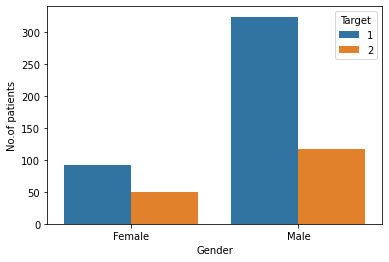

In [14]:
sns.countplot(x=df['Gender'],hue=df.Target)
plt.xlabel('Gender',fontsize=10) 
plt.ylabel('No.of patients',fontsize=10)
plt.show()

* ### Most of the MALE patients have liver disease

### All features wrt Target

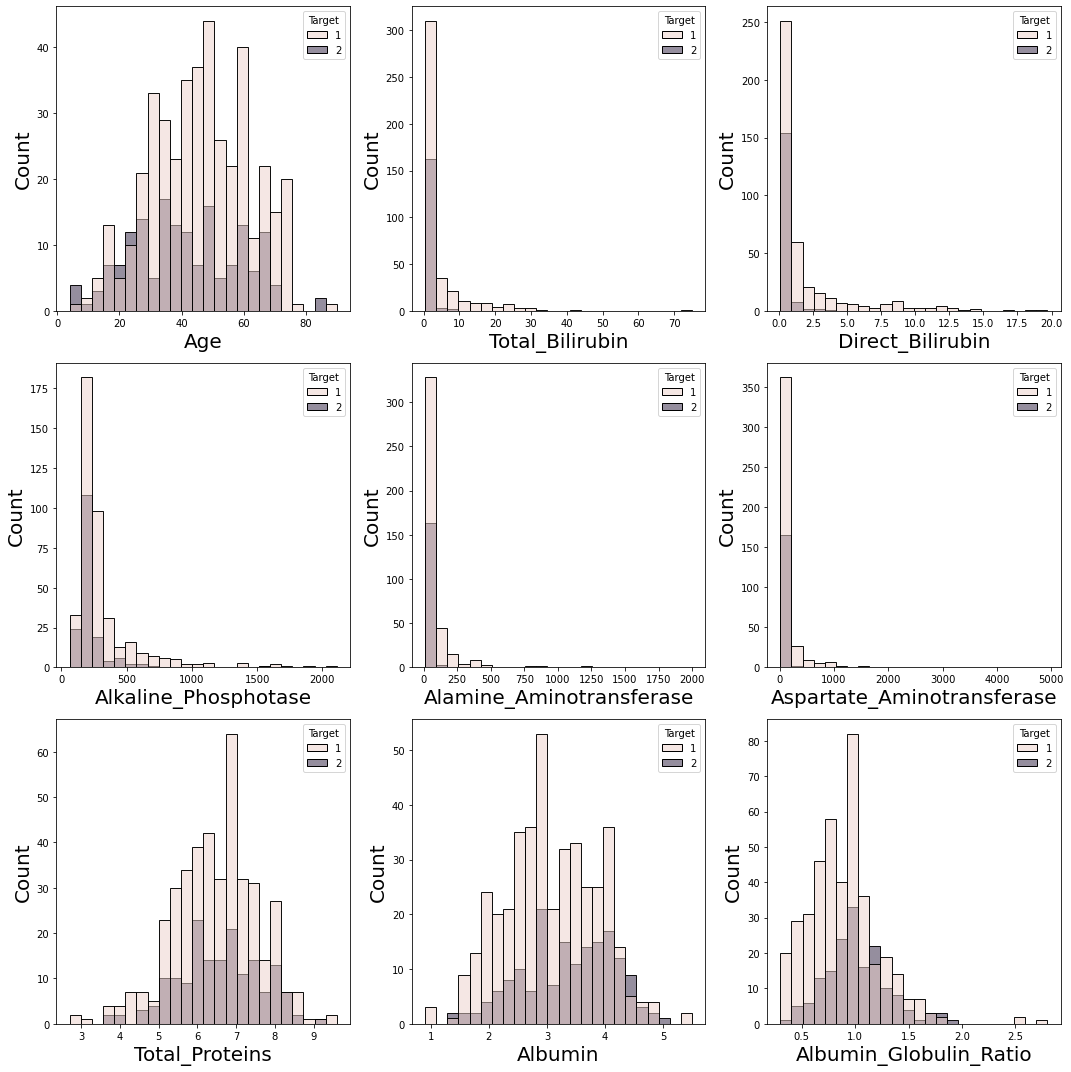

In [15]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(15,15), facecolor='white')#canvas size
plotnumber = 1#counter for number of plot

for column in df.drop(['Gender','Target'],axis=1):#acessing columns form data2 DataFrame
    if plotnumber<=9 :#checking whether counter is less than 16 or not
        ax = plt.subplot(3,3,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.histplot(x=df[column].dropna(axis=0)# plotting hist plot and dropping null values,classification according to target
                        ,hue=df.Target,bins=24)
        plt.xlabel(column,fontsize=20)##assigning name to x-axis and increasing it's font 
        plt.ylabel('Count',fontsize=20)#assigning name to y-axis and increasing it's font 
    plotnumber+=1#increasing counter by 1
plt.tight_layout()

* #### People around 50 years are affected with liver disease the most.

### Pairplot wrt Target

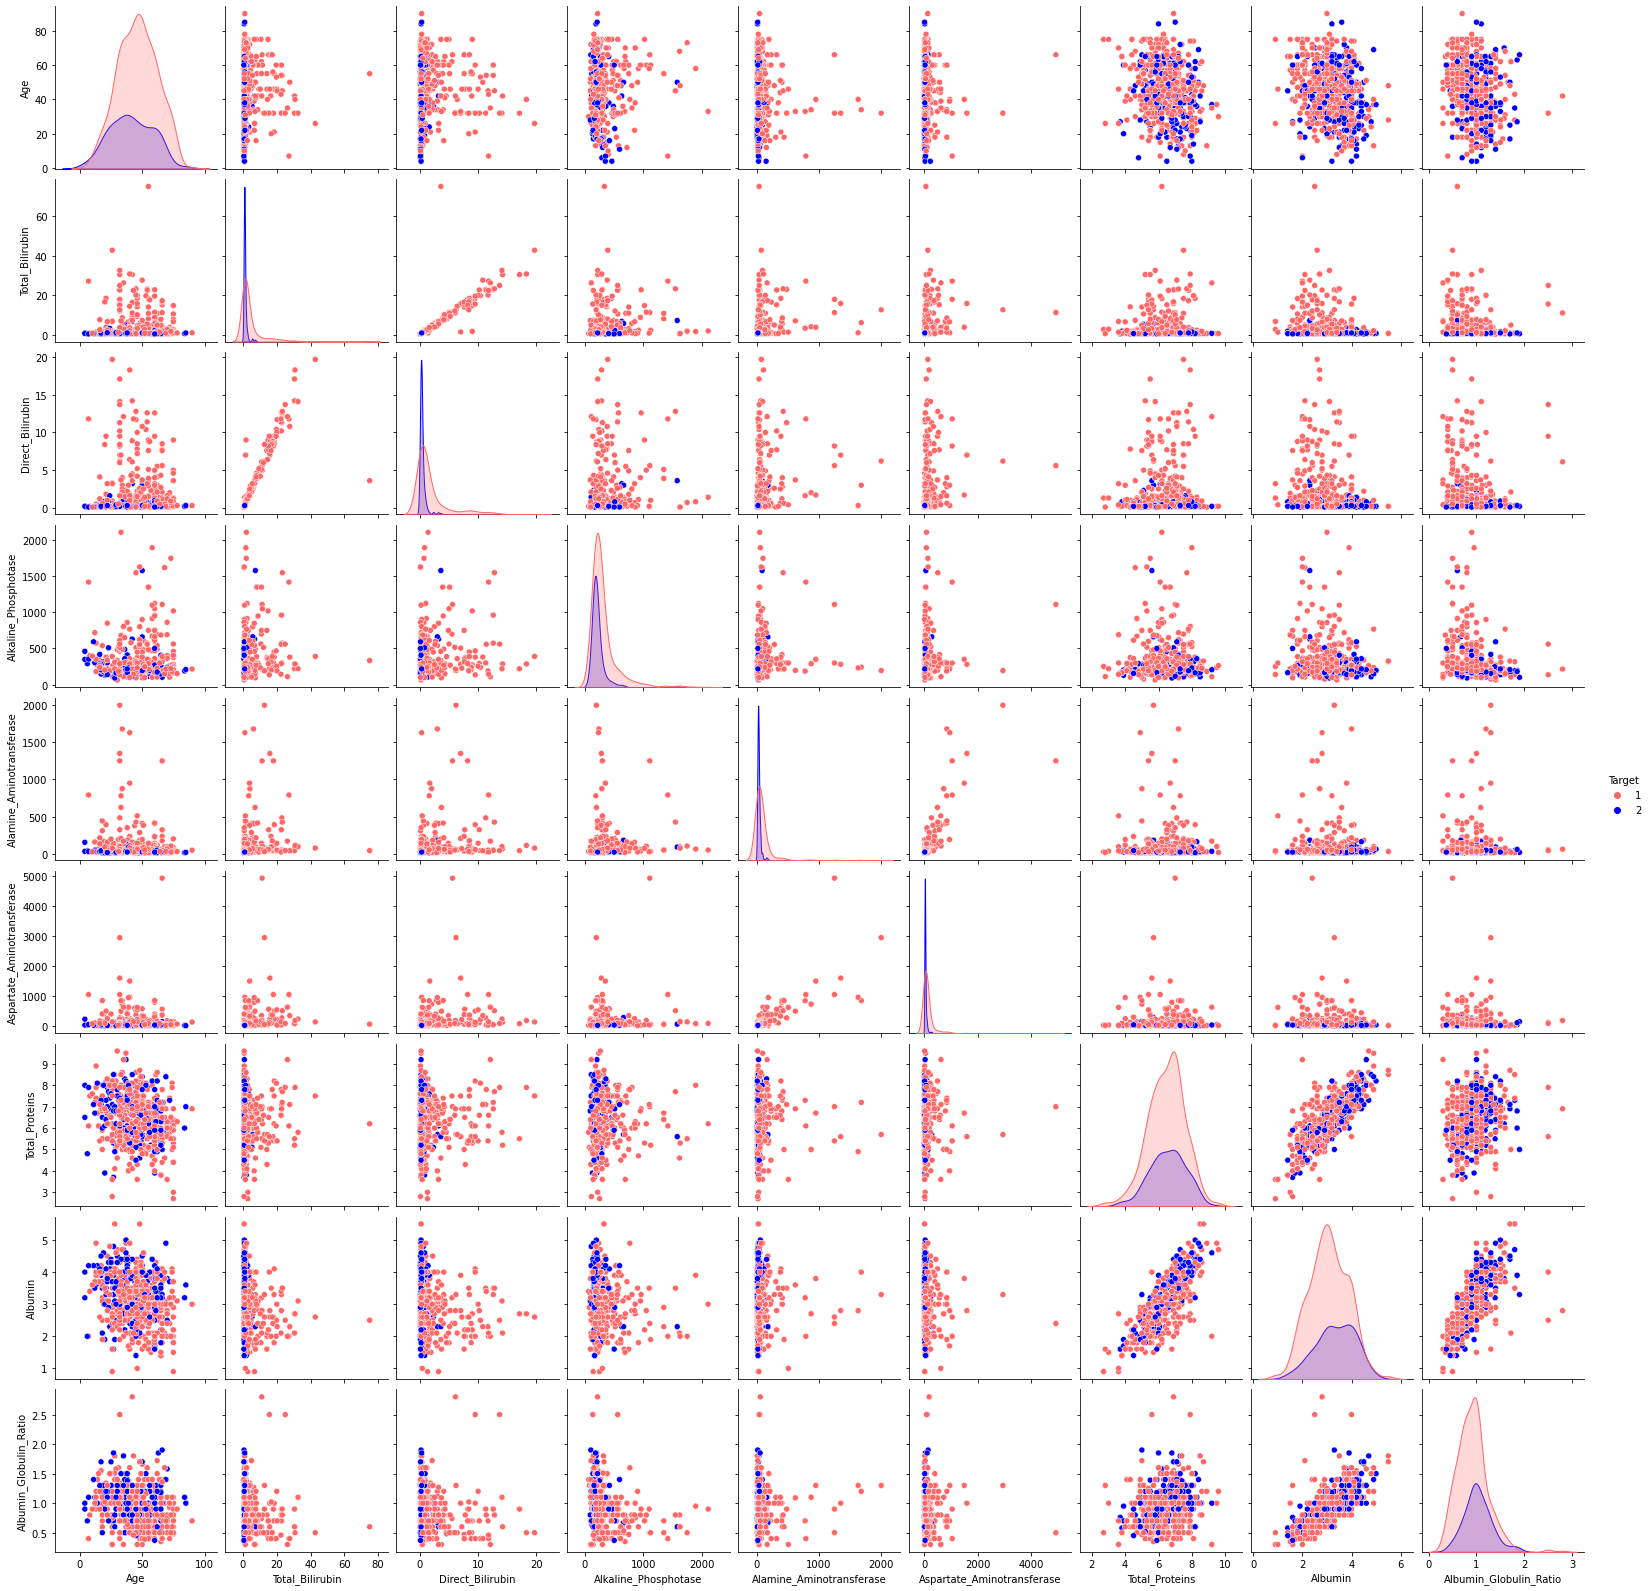

In [16]:
custom_colors = {1: '#FF6666', 2: 'blue'}

# Plot the pairplot with customized colors
sns.pairplot(df, hue='Target', palette=custom_colors)


### Total_Bilirubin Vs Direct_Bilirubin, Alamine_Aminotransferase, Aspartate_Aminotransferase wrt Target

<Figure size 216x216 with 0 Axes>

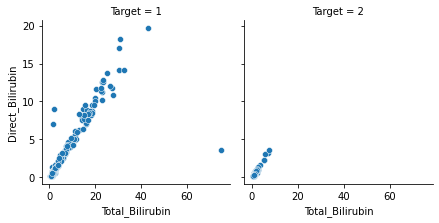

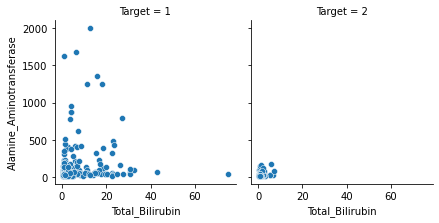

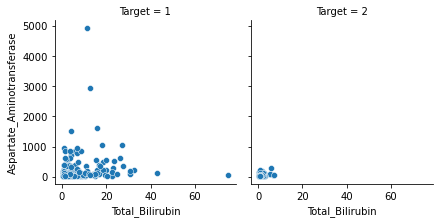

In [17]:
col= ['Direct_Bilirubin', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase']
plt.figure(figsize=(3, 3))
for col in col:
    sns.relplot(x='Total_Bilirubin', y=col, col='Target', data=df, height=3, aspect=1)
plt.show()


* #### The patients who DO NOT have liver disease have LOW Total_Bilirubin, Direct_Bilirubin, Alamine_Aminotransferase and Aspartate_Aminotransferase.

# DATA PREPROCESSING

## 1.CHECKING AND IMPUTING MISSING VALUE

In [18]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_Globulin_Ratio        4
Target                        0
dtype: int64

* ### Only 4 values in 'Albumin_Globulin_Ratio' are missing.

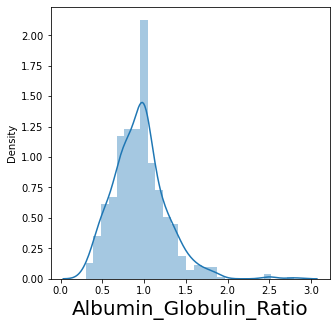

In [19]:
# checking the distributuion before imputing the NULL to decide between mean() and median()
plt.figure(figsize=(5,5)) # defining canvas size
sns.distplot(x=df['Albumin_Globulin_Ratio']) 
plt.xlabel('Albumin_Globulin_Ratio',fontsize=20)
plt.show()

* #### The plot is almost normally distributed. So we choose mean() of the data to impute the NULL

In [20]:
df.loc[df['Albumin_Globulin_Ratio'].isnull()==True,'Albumin_Globulin_Ratio']=df['Albumin_Globulin_Ratio'].mean()

In [21]:
df['Albumin_Globulin_Ratio'].isnull().sum()

0

## 2.ENCODING CATEGORICAL DATA

### Gender

In [22]:
df.Gender.value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [23]:
# as Male is too high, we give it higher value,1.
df.Gender = df.Gender.map({'Male':1,'Female':0})

In [24]:
df.Gender.value_counts()

1    441
0    142
Name: Gender, dtype: int64

### Target

In [25]:
df.Target.value_counts()

1    416
2    167
Name: Target, dtype: int64

In [26]:
# As 1 indicated 'liver disease' and 2 indicated 'No liver disease', we change 2 to 0, to make the target binary and to avoid confusion.
df.loc[df['Target']==2,'Target']=0

In [27]:
df.Target.value_counts()

1    416
0    167
Name: Target, dtype: int64

In [28]:
df.head(1)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.9,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_Globulin_Ratio      583 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


## 3. HANDLING OUTLIERS

In [30]:
out1= df[['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_Globulin_Ratio']]

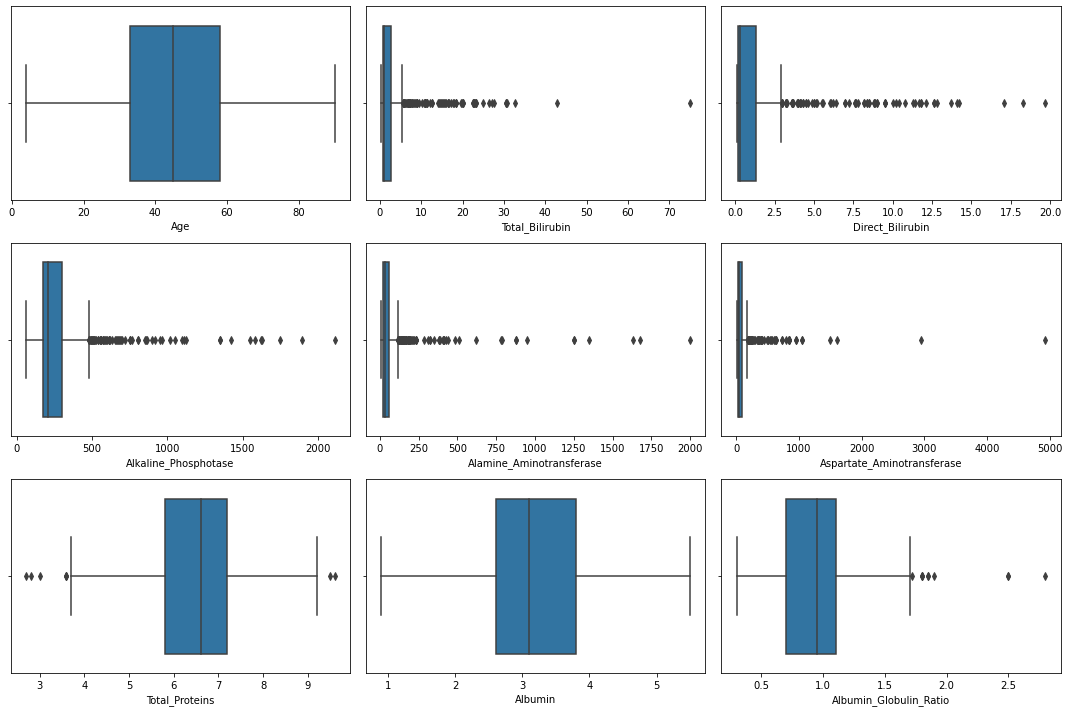

In [31]:
plt.figure(figsize=(15,10)) # defining canvas size
plotno = 1 # counter

for column in out1: # iteration of columns / accessing the columns from  dataset 
    if plotno<=9:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 11 graphs (3-rows,4-columns) ,plotnumber is for count
        sns.boxplot(x=df[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=10)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

* 'Age' and 'albumin' do not have outliers.
* 'Total_Proteins'and 'Albumin_Globulin_Ratio' have few outliers.
* Rest of the features have lot of outliers. So we do not impute them.

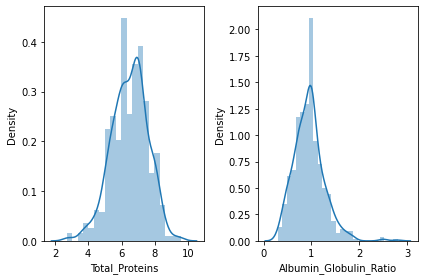

In [32]:
plotno = 1 # counter

for column in ['Total_Proteins', 'Albumin_Globulin_Ratio']: # iteration of columns / acessing the columns from  dataset 
    if plotno<=2:    # set the limit
        plt.subplot(1,2,plotno) # # plotting 11 graphs (3-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=df[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=10)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

* #### Since both the plots are normally distributed we use 3 sigma to calculate min limit and max limit

#### 'Total_Proteins'

In [33]:
max_limit = df['Total_Proteins'].mean() + 3*df['Total_Proteins'].std()

min_limit = df['Total_Proteins'].mean() - 3*df['Total_Proteins'].std()

# Identify outliers
outliers = df[(df['Total_Proteins'] < min_limit) | (df['Total_Proteins'] > max_limit)]
display(outliers.head(10))

print(f'% of outliers present in Total_Proteins: {len(outliers)/df.shape[0]*100}')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
180,75,1,2.8,1.3,250,23,29,2.7,0.9,0.5,1
181,75,1,2.9,1.3,218,33,37,3.0,1.5,1.0,1
269,26,1,0.6,0.1,110,15,20,2.8,1.6,1.3,1


% of outliers present in Total_Proteins: 0.5145797598627788


* #### 'Total_Proteins' has just 3 outliers . So, we impute them with mean()

In [34]:
df.loc[df['Total_Proteins'] <  min_limit,'Total_Proteins'] = df['Total_Proteins'].mean()
df.loc[df['Total_Proteins'] > max_limit,'Total_Proteins'] = df['Total_Proteins'].mean()

In [35]:
# Rechecking for any more outliers
outliers = df[(df['Total_Proteins'] < min_limit) | (df['Total_Proteins'] > max_limit)]
display(outliers.head(10))

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target


#### 'Albumin_Globulin_Ratio'

In [36]:
max_limit = df['Albumin_Globulin_Ratio'].mean() + 3*df['Albumin_Globulin_Ratio'].std()

min_limit = df['Albumin_Globulin_Ratio'].mean() - 3*df['Albumin_Globulin_Ratio'].std()

# Identify outliers
outliers = df[(df['Albumin_Globulin_Ratio'] < min_limit) | (df['Albumin_Globulin_Ratio'] > max_limit)]
display(outliers.head(10))

print(f'% of outliers present in Albumin_Globulin_Ratio: {len(outliers)/df.shape[0]*100}')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
548,42,1,11.1,6.1,214,60,186,6.9,2.8,2.8,1
572,32,1,15.6,9.5,134,54,125,5.6,4.0,2.5,1
575,32,1,25.0,13.7,560,41,88,7.9,2.5,2.5,1


% of outliers present in Albumin_Globulin_Ratio: 0.5145797598627788


* #### 'Albumin_Globulin_Ratio' has just 3 outliers . So, we impute them with mean()

In [37]:
df.loc[df['Albumin_Globulin_Ratio'] > max_limit,'Albumin_Globulin_Ratio'] = df['Albumin_Globulin_Ratio'].mean()

In [38]:
# Rechecking for any more outliers
outliers = df[(df['Albumin_Globulin_Ratio'] < min_limit) | (df['Albumin_Globulin_Ratio'] > max_limit)]
display(outliers.head(10))

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target


## 4. CHECK FOR DUPLICATE ROWS

In [39]:
# checking for duplicate ROWS
df.duplicated().sum()

13

In [40]:
# displaying all the duplicate rows
df[df.duplicated(keep=False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
18,40,0,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,0,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,1,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,1,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,0,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,0,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,1,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,1,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,1,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,1,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [41]:
df = df.drop_duplicates()

In [42]:
df.duplicated().sum()

0

In [43]:
df.shape

(570, 11)

* 13 rows are deleted.

# FEATURE ENGINEERING AND FEATURE SELECTION

## CHECK FOR DUPLICATE FEATURES

In [44]:
# checking for duplicate FEATURES
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features

get_duplicate_features(df)

,Desc,feature1,feature2


* There are no duplicate features.

## CHECK FOR CORRELATED FEATURES

In [46]:
d1=['Gender','Target']
# Only continuous features
data1=df.drop(d1,axis=1)

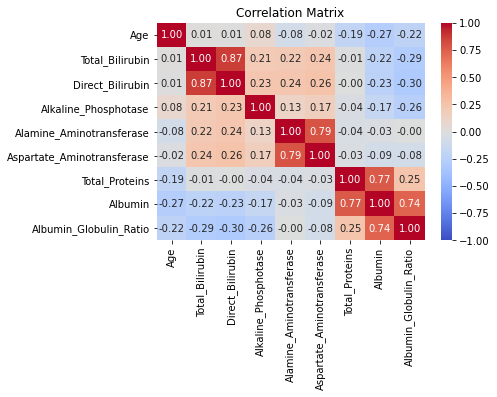

In [47]:
# identify highly negative and positive correlations by looking for dark blue and dark red cells with values close to -1 and +1 in the heatmap resp.
sns.heatmap(data1.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

* No features are highly correlated( above 0.90).

# SPLIT THE DATA FOR TRAIN AND TEST

In [48]:
X=df.drop(columns=['Target'])
y=df['Target']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# FEATURE SCALING
*  It is generally a good approach to perform feature scaling after the train-test split to prevent data leakage. 

### MIN-MAX SCALING

* Scale the feature between 0 to 1


* Use min max scaling because of dataset contain large amount of outlier so outlier is going to be biased.

In [50]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DATA BALANCING
*  It is generally a good approach to handle class imbalance after the train-test split to prevent data leakage. 

In [51]:
y.value_counts()

1    406
0    164
Name: Target, dtype: int64

* Data is not balanced. Model will learn more about 1.

### SMOTE

In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [53]:
from collections import Counter

# checking count for each class
print('Count of each class in train data before balancing:',Counter(y_train))

# Apply smote on train data
X_smote,y_smote=smote.fit_resample(X_train_scaled,y_train)

# checking count for each class after balancing
print('Count of each class in train data after balancing:',Counter(y_smote))

Count of each class in train data before balancing: Counter({1: 303, 0: 124})
Count of each class in train data after balancing: Counter({1: 303, 0: 303})


# MODEL BUILDING

## 1. LOGISTIC REGRESSION

### (a) Using Balanced Data

In [58]:
log=LogisticRegression(random_state = 42)

In [59]:
log.fit(X_smote,y_smote)

LogisticRegression(random_state=42)

In [60]:
# Predicting using TEST data
y_pred=log.predict(X_test_scaled)

In [61]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Target,,
0,30,10
1,36,67


* There are 36+10=46 misclassifications

In [62]:
f1=f1_score(y_test,y_pred)
f1

0.7444444444444445

In [63]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.45      0.75      0.57        40
           1       0.87      0.65      0.74       103

    accuracy                           0.68       143
   macro avg       0.66      0.70      0.66       143
weighted avg       0.75      0.68      0.69       143



In [64]:
#checking TEST accuracy
acc_test=accuracy_score(y_test,y_pred)
acc_test

0.6783216783216783

In [65]:
# Predicting using train data to check for OVERFITTING
y_smote_pred=log.predict(X_smote)

#checking TRAIN accuracy
acc_smote=accuracy_score(y_smote,y_smote_pred)
acc_smote

0.7029702970297029

In [66]:
print(classification_report(y_smote,y_smote_pred))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       303
           1       0.76      0.59      0.66       303

    accuracy                           0.70       606
   macro avg       0.71      0.70      0.70       606
weighted avg       0.71      0.70      0.70       606



* In BALANCED data, only train accuracy (0.70) is SLIGHTLY GREATER than test accuracy (0.67). Rest all the metrices are LOWER for train data than the test data. Hence, slightly overfitting.

In [67]:
from sklearn.metrics import roc_auc_score

y_pred_proba = log.predict_proba(X_test_scaled)[:, 1]

# True labels for the testing set
y_true = y_test

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_true, y_pred_proba)

print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.7320388349514563


* #### In BALANCED data,without hyperparameter tuning f1 score is **0.74**

### Hyperparameter Tuning Using GridsearchCV

In [68]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty ('l1' for Lasso, 'l2' for Ridge)
}
grid = GridSearchCV(LogisticRegression(random_state = 42), param_grid, verbose =1,scoring='f1',cv=5)

grid.fit(X_smote,y_smote)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [69]:
print(grid.best_estimator_)

LogisticRegression(C=100, random_state=42)


In [70]:
log_hpt=LogisticRegression(C=100, random_state=42)

In [71]:
log_hpt.fit(X_smote,y_smote)

LogisticRegression(C=100, random_state=42)

In [72]:
# Predicting using TEST data
y_pred_hpt=log_hpt.predict(X_test_scaled)

In [73]:
pd.crosstab(y_test,y_pred_hpt)

col_0,0,1
Target,,
0,30,10
1,44,59


In [74]:
print(classification_report(y_test,y_pred_hpt))

              precision    recall  f1-score   support

           0       0.41      0.75      0.53        40
           1       0.86      0.57      0.69       103

    accuracy                           0.62       143
   macro avg       0.63      0.66      0.61       143
weighted avg       0.73      0.62      0.64       143



* After hyperparameter tuning, f1 score in balanced data has reduced from 0.74 to **0.69**

### (b) Using Unbalanced Data

In [75]:
log.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

In [76]:
y_pred1=log.predict(X_test_scaled)

In [77]:
pd.crosstab(y_test,y_pred1)

col_0,0,1
Target,,
0,3,37
1,1,102


* 38 wrong prediction

In [78]:
cr=classification_report(y_test,y_pred1)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.07      0.14        40
           1       0.73      0.99      0.84       103

    accuracy                           0.73       143
   macro avg       0.74      0.53      0.49       143
weighted avg       0.74      0.73      0.65       143



In [79]:
f1=f1_score(y_test,y_pred1)
f1

0.8429752066115703

In [80]:
#checking TEST accuracy
acc_test=accuracy_score(y_test,y_pred1)
acc_test

0.7342657342657343

In [81]:
# Predicting using train data to check for OVERFITTING
y_train_pred1=log.predict(X_train_scaled)

In [82]:
#checking TRAIN accuracy
acc_train=accuracy_score(y_train,y_train_pred1)
acc_train

0.7072599531615925

* In UNBALANCED data, accuracy is SLIGHTLY LOWER for train data than on the test data prediction. Hence, NO OVERFITTING.

In [84]:
y_pred_proba = log.predict_proba(X_test_scaled)[:, 1]

# True labels for the testing set
y_true = y_test

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_true, y_pred_proba)

print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.725242718446602


* #### In UNBALANCED data, without hyperparameter tuning f1 score is **0.84**

### Hyperparameter Tuning Using GridSearch CV

In [85]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty ('l1' for Lasso, 'l2' for Ridge)
}
grid = GridSearchCV(LogisticRegression(random_state = 42), param_grid, verbose =1,scoring='f1',cv=5)

grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [86]:
print(grid.best_estimator_)

LogisticRegression(C=0.001, random_state=42)


In [87]:
log_hpt=LogisticRegression(C=0.001, random_state=42)

In [88]:
log_hpt.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001, random_state=42)

In [89]:
y_pred_hpt=log_hpt.predict(X_test_scaled)

In [90]:
pd.crosstab(y_test,y_pred_hpt)

col_0,1
Target,
0,40
1,103


* There is no 0 prediction at all by the model for unbalanced data.
* There are 40 wrong predictions as 1

In [91]:
print(classification_report(y_test,y_pred_hpt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.72      1.00      0.84       103

    accuracy                           0.72       143
   macro avg       0.36      0.50      0.42       143
weighted avg       0.52      0.72      0.60       143



* #### f1 score for UNBALANCED data is **0.84** even after applying hyperparameter tuning

## 2. SUPPORT VECTOR CLASSIFIER

### (a) Using BALANCED Data

In [92]:
svclassifier = SVC(random_state=42) ## base model with default parameters

In [93]:
svclassifier.fit(X_smote, y_smote)

SVC(random_state=42)

In [94]:
y_pred=svclassifier.predict(X_test_scaled)

In [95]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Target,,
0,33,7
1,48,55


* 55 misclassifications in balanced data.

In [96]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.41      0.82      0.55        40
           1       0.89      0.53      0.67       103

    accuracy                           0.62       143
   macro avg       0.65      0.68      0.61       143
weighted avg       0.75      0.62      0.63       143



In [97]:
f1=f1_score(y_test,y_pred)
f1

0.6666666666666666

* #### In BALANCED data, before applying hyperparameter tuning, f1 score is 0.67

### Hyper Parameter Tuning Using GridSearchCV

In [98]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, verbose =1,scoring='f1',cv=3)

grid.fit(X_smote, y_smote)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=1)

In [99]:
print(grid.best_params_)

{'C': 1000, 'gamma': 1}


In [100]:
print(grid.best_estimator_)

SVC(C=1000, gamma=1, random_state=42)


In [101]:
svclassifier_hpt=SVC(C=1000, gamma=1, random_state=42)

In [102]:
svclassifier_hpt.fit(X_smote, y_smote)

SVC(C=1000, gamma=1, random_state=42)

In [103]:
y_pred_hpt=svclassifier_hpt.predict(X_test_scaled)

In [104]:
pd.crosstab(y_test,y_pred_hpt)

col_0,0,1
Target,,
0,28,12
1,41,62


* 53 misclassifications.

In [105]:
cr=classification_report(y_test,y_pred_hpt)
print(cr)

              precision    recall  f1-score   support

           0       0.41      0.70      0.51        40
           1       0.84      0.60      0.70       103

    accuracy                           0.63       143
   macro avg       0.62      0.65      0.61       143
weighted avg       0.72      0.63      0.65       143



In [106]:
f1=f1_score(y_test,y_pred_hpt)
f1

0.7005649717514123

* #### In BALANCED data, after applying hyperparameter tuning, f1 score is **0.70**

### (b) Using UNBALANCED Data

In [107]:
svclassifier.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [108]:
# Predicting using TEST data
y_pred1=svclassifier.predict(X_test_scaled)

In [109]:
pd.crosstab(y_test,y_pred1)

col_0,1
Target,
0,40
1,103


* There is no 0 prediction at all by the model for unbalanced data.
* There are 40 wrong predictions as 1

In [110]:
cr=classification_report(y_test,y_pred1)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.72      1.00      0.84       103

    accuracy                           0.72       143
   macro avg       0.36      0.50      0.42       143
weighted avg       0.52      0.72      0.60       143



In [111]:
#checking test accuracy
acc_test=accuracy_score(y_test,y_pred1)
acc_test

0.7202797202797203

In [112]:
# Predicting using TRAIN data to check for OVERFITTING
y_train_pred1=svclassifier.predict(X_train_scaled)

In [113]:
#checking train accuracy
acc_train=accuracy_score(y_train,y_train_pred1)
acc_train

0.7096018735362998

*  In UNBALANCED data, accuracy is SLIGHTLY LOWER for train data than the test data prediction. Hence, NO OVERFITTING.
*  In UBALANCED data, before applying hyperparameter tuning, f1 score is **0.84**

### Hyper Parameter Tuning Using GridSearchCV

In [115]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, verbose =1,scoring='f1',cv=3)

grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=1)

In [116]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1, random_state=42)


In [117]:
svclassifier_hpt=SVC(C=0.1, gamma=1, random_state=42)

In [118]:
svclassifier_hpt.fit(X_train_scaled, y_train)

SVC(C=0.1, gamma=1, random_state=42)

In [119]:
y_pred_hpt=svclassifier_hpt.predict(X_test_scaled)

In [120]:
pd.crosstab(y_test,y_pred_hpt)

col_0,1
Target,
0,40
1,103


* There is no 0 prediction at all by the model for balanced data as well.
* There are 40 wrong predictions as 1

In [121]:
cr=classification_report(y_test,y_pred_hpt)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.72      1.00      0.84       103

    accuracy                           0.72       143
   macro avg       0.36      0.50      0.42       143
weighted avg       0.52      0.72      0.60       143



In [122]:
f1=f1_score(y_test,y_pred_hpt)
f1

0.8373983739837398

* #### Even after applying hyperparameter tuning, all the metrics are same for UNBALANCED data.
* #### f1 score for UNBALANCED data after applying hyperparameter tuning is **0.84**

## 3. RANDOM FOREST

### (a) Using BALANCED Data

In [167]:
import random

# Set random seed for NumPy
np.random.seed(42)

# Set random seed for Python's random module
random.seed(42)

In [168]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42) #object creation ,taking 100 decision tree in random forest 

In [169]:
rf_clf.fit(X_smote,y_smote)

RandomForestClassifier(random_state=42)

In [170]:
y_pred=rf_clf.predict(X_test_scaled)

In [171]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Target,,
0,18,22
1,26,77


* 48 misclassifications.

In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.45      0.43        40
           1       0.78      0.75      0.76       103

    accuracy                           0.66       143
   macro avg       0.59      0.60      0.60       143
weighted avg       0.67      0.66      0.67       143



In [173]:
f1_score(y_test,y_pred)

0.7623762376237624

* #### In BALANCED data, before applying hyperparameter tuning, f1 score is **0.76**

## Hyper Parameter Tuning Using RandomizedSearchCV

In [190]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]       #Number of decision trees. linespace gives float. so convert to int.
max_features = ['log2', 'sqrt']   # because random forest do feature sampling also.                               #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.

In [191]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [192]:
rf_clf1 = RandomForestClassifier(random_state=42)

In [193]:
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


In [194]:
rf_cv.fit(X_smote, y_smote)                                  ##training data on randomsearch cv
rf_best_params = rf_cv.best_params_                          ##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20})


In [195]:
rf_cv.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [196]:
rf_clf_hpt = RandomForestClassifier(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 1, 
                                 max_features= 'sqrt', max_depth= 20,random_state=42)

In [197]:
rf_clf_hpt.fit(X_smote, y_smote)

y_pred_hpt=rf_clf_hpt.predict(X_test_scaled)

f1_score(y_test,y_pred_hpt)

0.788177339901478

In [198]:
pd.crosstab(y_test,y_pred_hpt)

col_0,0,1
Target,,
0,20,20
1,23,80


* 43 misclassifications

In [199]:
cr=classification_report(y_test,y_pred_hpt)
print(cr)

              precision    recall  f1-score   support

           0       0.47      0.50      0.48        40
           1       0.80      0.78      0.79       103

    accuracy                           0.70       143
   macro avg       0.63      0.64      0.64       143
weighted avg       0.71      0.70      0.70       143



* #### In BALANCED data, after applying hyperparameter tuning, f1 score is **0.79**

### (b) Using UNBALANCED Data

In [174]:
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [175]:
# Predicting using TEST data
y_pred1=rf_clf.predict(X_test_scaled)

In [176]:
pd.crosstab(y_test,y_pred1)

col_0,0,1
Target,,
0,14,26
1,13,90


* 39 misclassifications

In [177]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.52      0.35      0.42        40
           1       0.78      0.87      0.82       103

    accuracy                           0.73       143
   macro avg       0.65      0.61      0.62       143
weighted avg       0.70      0.73      0.71       143



In [178]:
f1_score(y_test,y_pred1 )

0.821917808219178

### Hyperparameter Tuning Using RandomizedSearchCV

In [200]:
rf_cv.fit(X_train_scaled, y_train)                                  ##training data on randomsearch cv
rf_best_params = rf_cv.best_params_                          ##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40})


In [201]:
rf_cv.best_estimator_

RandomForestClassifier(max_depth=40, max_features='log2', n_estimators=1800,
                       random_state=42)

In [202]:
rf_clf_hpt = RandomForestClassifier(n_estimators= 1800, min_samples_split= 2, min_samples_leaf= 1, 
                                 max_features= 'log2', max_depth= 40,random_state=42)

In [203]:
rf_clf_hpt.fit(X_train_scaled, y_train)

y_pred_hpt=rf_clf_hpt.predict(X_test_scaled)

f1_score(y_test,y_pred_hpt)

0.8340807174887893

In [204]:
pd.crosstab(y_test,y_pred_hpt)

col_0,0,1
Target,,
0,13,27
1,10,93


* 37 misclassifications

In [205]:
cr=classification_report(y_test,y_pred_hpt)
print(cr)

              precision    recall  f1-score   support

           0       0.57      0.33      0.41        40
           1       0.78      0.90      0.83       103

    accuracy                           0.74       143
   macro avg       0.67      0.61      0.62       143
weighted avg       0.72      0.74      0.72       143



* #### In UNBALANCED data, after applying hyperparameter tuning, f1 score is **0.83**

## 4. KNN

### (a) Using BALANCED Data

In [206]:
# create a list to store the error values for each K value
error_rate=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_smote,y_smote)
    pred_i=knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error rate')

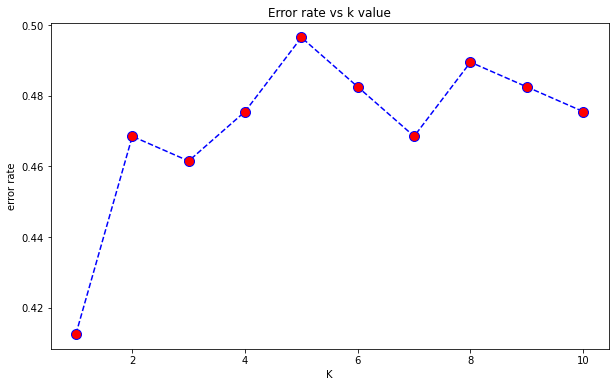

In [207]:
#lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue',linestyle='dashed',
         marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs k value')
plt.xlabel('K')
plt.ylabel('error rate')

* Choose k=3

In [208]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_smote,y_smote)
y_pred=knn.predict(X_test_scaled)

In [209]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.31      0.55      0.40        40
           1       0.75      0.53      0.62       103

    accuracy                           0.54       143
   macro avg       0.53      0.54      0.51       143
weighted avg       0.63      0.54      0.56       143



In [210]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Target,,
0,22,18
1,48,55


* 66 misclassification

* #### In BALANCED data, before applying hyperparameter tuning, f1 score is **0.62**

### Hyperparameter Tuning Using GridSearch CV

In [211]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Values of K to try
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Instantiate KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')

# Fit GridSearchCV to training data
grid_search.fit(X_smote, y_smote)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation score:", grid_search.best_score_)

best_knn = grid_search.best_estimator_

# Evaluate the best model on the testing set
test_accuracy = best_knn.score(X_test_scaled, y_test)
print("Test set accuracy of the best model:", test_accuracy)

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.7277739338527348
Test set accuracy of the best model: 0.5384615384615384


In [212]:
# Get the best estimator
best_knn

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [213]:
knn_hpt=KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [214]:
knn_hpt.fit(X_smote,y_smote)
y_pred_hpt=knn_hpt.predict(X_test_scaled)

In [215]:
cr=classification_report(y_test,y_pred_hpt)
print(cr)

              precision    recall  f1-score   support

           0       0.31      0.55      0.40        40
           1       0.75      0.53      0.62       103

    accuracy                           0.54       143
   macro avg       0.53      0.54      0.51       143
weighted avg       0.63      0.54      0.56       143



* #### The f1-score on BALANCED data before and after hyperparameter tuning is **0.62**

### (b) Using UNBALANCED Data

In [144]:
# create a list to store the error values for each k
error_rate=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i=knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error rate')

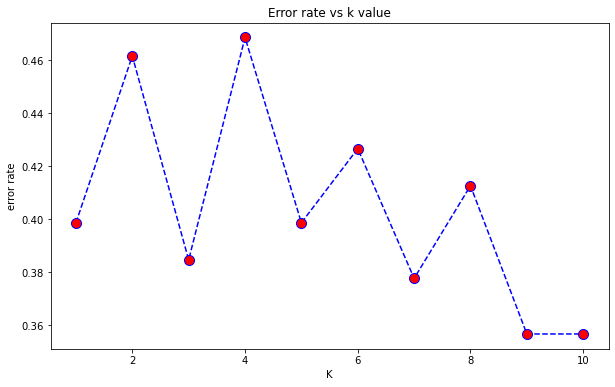

In [145]:
#lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue',linestyle='dashed',
         marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs k value')
plt.xlabel('K')
plt.ylabel('error rate')

* Choose K=9

In [146]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
y_pred=knn.predict(X_test_scaled)

In [147]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.30      0.20      0.24        40
           1       0.72      0.82      0.77       103

    accuracy                           0.64       143
   macro avg       0.51      0.51      0.50       143
weighted avg       0.60      0.64      0.62       143



In [148]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Target,,
0,8,32
1,19,84


* 51 misclassification

* #### In UNBALANCED data, before applying hyperparameter tuning, f1 score is **0.77**

### Using Hyperparameter Tuning

In [216]:
# Fit GridSearchCV to training data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation score:", grid_search.best_score_)

best_knn = grid_search.best_estimator_

# Evaluate the best model on the testing set
test_accuracy = best_knn.score(X_test_scaled, y_test)
print("Test set accuracy of the best model:", test_accuracy)

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score: 0.8028842728035717
Test set accuracy of the best model: 0.6013986013986014


In [217]:
# Get the best estimator
best_knn

KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')

In [218]:
knn_hpt=KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')

In [219]:
knn_hpt.fit(X_train_scaled, y_train)
y_pred_hpt=knn_hpt.predict(X_test_scaled)

In [221]:
cr=classification_report(y_test,y_pred_hpt)
print(cr)

              precision    recall  f1-score   support

           0       0.24      0.20      0.22        40
           1       0.71      0.76      0.73       103

    accuracy                           0.60       143
   macro avg       0.48      0.48      0.48       143
weighted avg       0.58      0.60      0.59       143



* #### The f1-score on UNBALANCED data before hyperparameter tuning is **0.77**
* #### The f1-score on UNBALANCED data after hyperparameter tuning is **0.73**

# CONCLUSION

In [222]:
from tabulate import tabulate

# * For a model, best F1-score among the normal model and its hyperparameter-tuned model is chosen.
headers = ["MODELS => ", "Logistic Regression", "SVC", "Random Forest","KNN"]
data = [["BALANCED DATA", 0.74, 0.70, 0.79,0.62],
        ["UNBALANCED DATA", 0.84, 0.84, 0.83,0.77]
]

# Generate the table
table = tabulate(data, headers=headers, tablefmt="grid",stralign="center", numalign="center")

# Define the label
#label = "Data Summary:"

# Print the label
print("F1-SCORE OF DIFFERENT MODELS ON BALANCED AND UNBALANCED DATA:")
# Print the table
print(table)

F1-SCORE OF DIFFERENT MODELS ON BALANCED AND UNBALANCED DATA:
+-----------------+-----------------------+-------+-----------------+-------+
|   MODELS =>     |  Logistic Regression  |  SVC  |  Random Forest  |  KNN  |
+=================+=======================+=======+=================+=======+
|  BALANCED DATA  |         0.74          |  0.7  |      0.79       | 0.62  |
+-----------------+-----------------------+-------+-----------------+-------+
| UNBALANCED DATA |         0.84          | 0.84  |      0.83       | 0.77  |
+-----------------+-----------------------+-------+-----------------+-------+


* f1-scores on UNBALANCED data are much better than on BALANCED data across the models.
* Logistic Regression,SVC and Random Forest give good f1-scores on UNBALANCED data.
* Random Forest give comparitively good f1-score on BALANCED data too.
* So, **hyperparameter-tuned Random Forest** model is the better choice.